In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date
from sklearn.metrics import r2_score as R2S

In [2]:
today = date.today()
print("Today's date:", today)
date_today = str(today)
date_today

Today's date: 2024-04-03


'2024-04-03'

In [3]:
tubulin = '[Tubulin] (' r'$\mu$' 'M)'
tub = 'tub'

DCXconc = '[DCX] (nM)' 
DCX = 'DCX'
Type = 'DCX Type'

drug = '[Drug] (' r'$\mu$' 'M)'

Concentration = 'Concentration (' r'$\mu$' 'M)'


In [4]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
darkyellow= '#FCF2B8'
yellow = '#FFCB05'
lightyellow = '#FCF2B8'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))


palette = [grey,cyan] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green]


StartHue3 = Color(lightyellow)
Yellowcolor = list(StartHue3.range_to(Color(darkyellow),5))
Yellowpalette = list(map(Color.get_hex,Yellowcolor))
Yellowpalette

['#fcf2b8', '#fcf2b8', '#fcf2b8', '#fcf2b8', '#fcf2b8']

In [5]:
matplotlib.rcParams['font.family'] = 'Helvetica Neue LT Std'

## Import Kappa csv ##

In [224]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [226]:
folders = [x for x in path.iterdir() if x.is_dir()]
folders = [i for i in folders if (str(i)[-4:] == 'pact') == True]
folders

[WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/2023-12-12_sec-dcx_WT-doublecap-tax/CH1_DCX500nM_typeWT_taxol10uM_compact'),
 WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/2023-12-12_sec-dcx_WT-doublecap-tax/CH2_DCX500nM_typeWT_taxol10uM_compact')]

In [227]:
files = []
for k in folders:
    files0 = [x for x in k.iterdir() if x.is_file()]
    files0 = [i for i in files0 if str(i).rfind('final') != -1 if str(i).rfind('csv') != -1]
    files = files + files0
files

[WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/2023-12-12_sec-dcx_WT-doublecap-tax/CH1_DCX500nM_typeWT_taxol10uM_compact/Stack_1-plain_Composite-amplified-final.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/2023-12-12_sec-dcx_WT-doublecap-tax/CH1_DCX500nM_typeWT_taxol10uM_compact/Stack_2-tax_Composite-amplified-final.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/2023-12-12_sec-dcx_WT-doublecap-tax/CH1_DCX500nM_typeWT_taxol10uM_compact/Stack_3-dcx_Composite-amplified-final.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/2023-12-12_sec-dcx_WT-doublecap-tax/CH2_DCX500nM_typeWT_taxol10uM_compact/Stack_1-plain_Composite-amplified-final.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/2023-12-12_sec-dcx_WT-doublecap-tax/CH2_DCX500nM_typeWT_taxol10uM_compact/Stack_2-tax_Composite-amplified-final.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/2023-12-12_sec-dcx_WT-doublecap-tax/CH2_D

In [228]:
files1 = [i for i in files if str(i).rfind('1-plain') != -1 ]
files2 = [i for i in files if str(i).rfind('2-tax') != -1 ]
files3 = [i for i in files if str(i).rfind('3-dcx') != -1 ]
files1

[WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/2023-12-12_sec-dcx_WT-doublecap-tax/CH1_DCX500nM_typeWT_taxol10uM_compact/Stack_1-plain_Composite-amplified-final.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/2023-12-12_sec-dcx_WT-doublecap-tax/CH2_DCX500nM_typeWT_taxol10uM_compact/Stack_1-plain_Composite-amplified-final.csv')]

In [229]:
def findmetadata(tag,end,i):
    n = len(tag)
    locstart = str(i).rfind(tag) 
    locend = str(i).find(end, locstart)
    tag0 = str(i)[locstart+n: locend]
    
    return tag0

In [230]:
dates= []
CH= []
tax= []
dcx = []
dcxtype= []
for i in files1:
    dateloc = str(i).rfind("202")   
    dates0 = str(i)[dateloc : dateloc+10]
    dates = dates + [dates0]

    CH0 = findmetadata("CH",'_',i)
    CH = CH + [CH0]  
    
    dcx0 = findmetadata("_DCX",'nM',i)
    dcx = dcx + [float(dcx0)] 
    
    type0 = findmetadata("type",'_',i)
    dcxtype = dcxtype + [type0] 
    
    tax0 = findmetadata("taxol",'uM',i)
    tax = tax + [float(tax0)] 
    

dates,CH,dcx, dcxtype,tax

(['2023-12-12', '2023-12-12'],
 ['1', '2'],
 [500.0, 500.0],
 ['WT', 'WT'],
 [10.0, 10.0])

In [231]:
def keep_avg_kappa(file,i,timepoint):
    data = pd.read_csv(file, encoding='utf-8')
    
    keep_columns = ['Curve Name','Curve Length (um)']
    
    data_avg = data.drop_duplicates(subset ='Curve Length (um)', keep = 'first')
    data_avg = data_avg[keep_columns]
    
    if timepoint == 'plain':
        data_avg[drug]=0
        data_avg['Drug Type']='None'
        data_avg[DCXconc]=0
        data_avg[Type]='None'
        
    if timepoint == 'tax':
        data_avg[drug]=float(tax[i])
        data_avg['Drug Type']='Paclitaxel'
        data_avg[DCXconc]=0
        data_avg[Type]='None'
        
    if timepoint == 'dcx':
        data_avg[drug]=float(tax[i])
        data_avg['Drug Type']='Paclitaxel'
        data_avg[DCXconc]=float(dcx[i])
        data_avg[Type]=dcxtype[i]
                
        
    data_avg['Date']=dates[i]
    data_avg['CH']=CH[i]
    
    return data_avg

In [232]:
data = pd.DataFrame(columns=[] , index=[])
for i in range(0,len(files1)):
    
    data_1plain_avg = keep_avg_kappa(files1[i],i,'plain')
    data_2tax_avg = keep_avg_kappa(files2[i],i,'tax')
    data_3dcx_avg = keep_avg_kappa(files3[i],i,'dcx')

    data0 = pd.concat([data_1plain_avg, data_2tax_avg, data_3dcx_avg], ignore_index=True)

    data0 = data0.sort_values(['Curve Name',drug,DCXconc])

    data = pd.concat([data,data0], ignore_index=True)

In [233]:
data

,Curve Name,Curve Length (um),[Drug] ($\mu$M),Drug Type,[DCX] (nM),DCX Type,Date,CH
0,CURVE 1,6.079942,0.0,None,0.0,None,2023-12-12,1
1,CURVE 1,6.213966,10.0,Paclitaxel,0.0,None,2023-12-12,1
2,CURVE 1,6.075509,10.0,Paclitaxel,500.0,WT,2023-12-12,1
3,CURVE 2,5.724138,0.0,None,0.0,None,2023-12-12,1
4,CURVE 2,5.824448,10.0,Paclitaxel,0.0,None,2023-12-12,1
5,CURVE 2,5.720080,10.0,Paclitaxel,500.0,WT,2023-12-12,1
6,CURVE 1,8.677009,0.0,None,0.0,None,2023-12-12,2
7,CURVE 1,8.810119,10.0,Paclitaxel,0.0,None,2023-12-12,2
8,CURVE 1,8.698247,10.0,Paclitaxel,500.0,WT,2023-12-12,2
9,CURVE 2,6.228867,0.0,None,0.0,None,2023-12-12,2


In [234]:
path.parents[1]

WindowsPath('D:/Sofia')

In [235]:
newdirectory = str(path.parents[0])+'//Compaction_Data_Sheets'
newmydir = Path(newdirectory)
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/Compaction_Data_Sheets')

In [236]:
name = dates[0]+'_'+dcxtype[0]+'_compaction_analysed-on_'+date_today +'.csv'
name

'2023-12-12_WT_compaction_analysed-on_2023-12-12.csv'

In [237]:
data.to_csv(path/(name), encoding='utf-8', index=False)
data.to_csv(newmydir/(name), encoding='utf-8', index=False)

### JOIN ###

In [238]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [239]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-9:] != 'Sheet.csv') == True]
files = [i for i in files if (str(i)[-3:] == 'csv') == True]
files

[WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/Compaction_Data_Sheets/2023-06-22_R178L_compaction_analysed-on_2023-11-15.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/Compaction_Data_Sheets/2023-11-10_R89G_compaction_analysed-on_2023-11-15.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/Compaction_Data_Sheets/2023-11-20_WT_compaction_analysed-on_2023-11-21.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/Compaction_Data_Sheets/2023-11-30_R178L_compaction_analysed-on_2023-11-30.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/Compaction_Data_Sheets/2023-12-01_R89G_compaction_analysed-on_2023-12-01.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/Compaction_Data_Sheets/2023-12-05_WT_compaction_analysed-on_2023-12-05.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall-DCXintensitydynmts/Compaction_Data_Sheets/2023-12-12_WT_compaction_analysed-on_2023-12-12.csv')]

In [240]:
joindata = pd.read_csv(files[0], encoding='utf-8',keep_default_na=False,na_values=['NaN'])
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8',keep_default_na=False,na_values=['NaN'])
    joindata = pd.concat([joindata, d], ignore_index=True)


joindata.to_csv(path/('jointdata-on_'+date_today +'_MasterSheet.csv'), encoding='utf-8', index=False)
joindata

,Curve Name,Curve Length (um),[Drug] ($\mu$M),Drug Type,[DCX] (nM),DCX Type,Date,CH
0,CURVE 1,10.496977,0.0,None,0.0,None,2023-06-22,1
1,CURVE 1,10.791002,10.0,Paclitaxel,0.0,None,2023-06-22,1
2,CURVE 1,10.544506,10.0,Paclitaxel,500.0,R178L,2023-06-22,1
3,CURVE 2,14.549901,0.0,None,0.0,None,2023-06-22,1
4,CURVE 2,14.968765,10.0,Paclitaxel,0.0,None,2023-06-22,1
...,...,...,...,...,...,...,...,...
127,CURVE 1,8.810119,10.0,Paclitaxel,0.0,None,2023-12-12,2
128,CURVE 1,8.698247,10.0,Paclitaxel,500.0,WT,2023-12-12,2
129,CURVE 2,6.228867,0.0,None,0.0,None,2023-12-12,2
130,CURVE 2,6.365793,10.0,Paclitaxel,0.0,None,2023-12-12,2


## Calculate expansion ##

In [241]:
# joindata = data

In [242]:
plainData = joindata.iloc[:-2:3]
taxData = joindata.iloc[1:-1:3]
dcxData = joindata.iloc[2::3]


In [243]:
def percent_expansion(beforeData, afterData):
    ratio = beforeData['Curve Length (um)'].values / afterData['Curve Length (um)'].values
    prcnt_expansion = (1- ratio)*100
    afterData['Expansion %'] = prcnt_expansion
    return afterData

In [244]:
percent_expansion(plainData, taxData)
percent_expansion(plainData, dcxData)

C:\Users\Brouhard Lab\AppData\Local\Temp\ipykernel_4276\4009520246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afterData['Expansion %'] = prcnt_expansion
C:\Users\Brouhard Lab\AppData\Local\Temp\ipykernel_4276\4009520246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afterData['Expansion %'] = prcnt_expansion


,Curve Name,Curve Length (um),[Drug] ($\mu$M),Drug Type,[DCX] (nM),DCX Type,Date,CH,Expansion %
2,CURVE 1,10.544506,10.0,Paclitaxel,500.0,R178L,2023-06-22,1,0.450750
5,CURVE 2,14.589281,10.0,Paclitaxel,500.0,R178L,2023-06-22,1,0.269922
8,CURVE 3,14.801374,10.0,Paclitaxel,500.0,R178L,2023-06-22,1,0.424582
11,CURVE 4,11.574313,10.0,Paclitaxel,500.0,R178L,2023-06-22,1,0.633906
14,CURVE 5,9.836784,10.0,Paclitaxel,500.0,R178L,2023-06-22,1,0.066940
17,CURVE 1,16.394800,10.0,Paclitaxel,500.0,R178L,2023-06-22,2,-0.018447
20,CURVE 3,11.821795,10.0,Paclitaxel,500.0,R178L,2023-06-22,2,-0.023934
23,CURVE 1,19.449787,10.0,Paclitaxel,500.0,R89G,2023-11-10,1,0.753593
26,CURVE 2,5.045669,10.0,Paclitaxel,500.0,R89G,2023-11-10,1,0.651527
29,CURVE 3,14.131694,10.0,Paclitaxel,500.0,R89G,2023-11-10,1,0.915662


In [396]:
finalData = pd.concat([taxData, dcxData], ignore_index=True)
# finalData = finalData.sort_values([drug,'CH','Curve Name',Type,DCXconc])
finalData = finalData[finalData['Curve Length (um)'] > 5.5]

In [397]:
finalData

,Curve Name,Curve Length (um),[Drug] ($\mu$M),Drug Type,[DCX] (nM),DCX Type,Date,CH,Expansion %
0,CURVE 1,10.791002,10.0,Paclitaxel,0.0,None,2023-06-22,1,2.724724
1,CURVE 2,14.968765,10.0,Paclitaxel,0.0,None,2023-06-22,1,2.798253
2,CURVE 3,15.221201,10.0,Paclitaxel,0.0,None,2023-06-22,1,3.171042
3,CURVE 4,11.789268,10.0,Paclitaxel,0.0,None,2023-06-22,1,2.445658
4,CURVE 5,10.073687,10.0,Paclitaxel,0.0,None,2023-06-22,1,2.417072
...,...,...,...,...,...,...,...,...,...
83,CURVE 1,7.968813,10.0,Paclitaxel,500.0,WT,2023-12-05,2,0.012327
84,CURVE 1,6.075509,10.0,Paclitaxel,500.0,WT,2023-12-12,1,-0.072971
85,CURVE 2,5.720080,10.0,Paclitaxel,500.0,WT,2023-12-12,1,-0.070944
86,CURVE 1,8.698247,10.0,Paclitaxel,500.0,WT,2023-12-12,2,0.244161


In [398]:
finalData.to_csv(path/('expansion_plain_to_tax_dcx_data-analyzed_'+date_today +'_MasterSheet.csv'), encoding='utf-8', index=False)

## Load merged CSV ##

In [40]:
askfile = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the folder on ONE date you want to process
filepath = Path(askfile)
filename = filepath.stem
filepath, filename

(WindowsPath('C:/Users/sofia/OneDrive - McGill University/CurrBio2023/Sofia/Data/compaction-dcx/expansion_plain_to_ALLtax_dcx_data-analyzed_2024-03-27_MasterSheet.csv'),
 'expansion_plain_to_ALLtax_dcx_data-analyzed_2024-03-27_MasterSheet')

In [41]:
mydir= filepath.parents[0]

In [51]:
finalData = pd.read_csv(filepath, encoding='utf-8').fillna('None')
finalData = finalData [finalData ['Curve Length (um)']> 5.5]

In [52]:
finalData.groupby(['DCX Type',drug]).count()

CH  Curve Length (um)  Curve Name  Date  Drug Type  \
DCX Type [Drug] ($\mu$M)                                                       
Control  0.0              15                 15          15    15         15   
None     0.1              12                 12          12    12         12   
         0.3              10                 10          10    10         10   
         1.0               8                  8           8     8          8   
         10.0             44                 44          44    44         44   
R178L    10.0              9                  9           9     9          9   
R89G     10.0             12                 12          12    12         12   
WT       10.0             12                 12          12    12         12   

                          Expansion %  [DCX] (nM)  
DCX Type [Drug] ($\mu$M)                           
Control  0.0                       15          15  
None     0.1                       12          12  
         0.3                       10          10  
         1.0                        8           8  
         10.0                      44          44  
R178L    10.0                       9           9  
R89G     10.0                      12          12  
WT       10.0                      12          12

In [45]:
nogales2018 = (1- 81.76/83.95)*100
nogales2018

2.608695652173909

In [46]:
TAXnogales2017preformed = (1- 81.5/81.8)*100
TAXnogales2017copoly = (1- 81.5/82.3)*100
TAXnogales2017preformed , TAXnogales2017copoly


(0.3667481662591676, 0.9720534629404587)

In [47]:
#### LAFRANCE expansion
mean_exp = 2.38
sd_exp = 0.58
sem_exp = 0.21

In [48]:
# finalData = finalData[(finalData['Date'] != '2023-11-20') & (finalData['Date'] != '2023-11-10') ]

In [14]:
Mut = ['WT','R89G','R178L']
dcx_palette = [green,pink,orange]


In [15]:
finalData[(finalData['DCX Type']=='None') | (finalData['DCX Type']=='WT') | (finalData['DCX Type']==Mut[0])| (finalData[drug]==0)]

,CH,Curve Length (um),Curve Name,DCX Type,Date,Drug Type,Expansion %,[DCX] (nM),[Drug] ($\mu$M)
0,1.0,10.791002,CURVE 1,None,2023-06-22,Paclitaxel,2.724724,0.0,10.0
1,1.0,14.968765,CURVE 2,None,2023-06-22,Paclitaxel,2.798253,0.0,10.0
2,1.0,15.221201,CURVE 3,None,2023-06-22,Paclitaxel,3.171042,0.0,10.0
3,1.0,11.789268,CURVE 4,None,2023-06-22,Paclitaxel,2.445658,0.0,10.0
4,1.0,10.073687,CURVE 5,None,2023-06-22,Paclitaxel,2.417072,0.0,10.0
...,...,...,...,...,...,...,...,...,...
134,None,None,None,None,None,None,None,None,None
135,None,None,None,None,None,None,None,None,None
136,None,None,None,None,None,None,None,None,None
137,None,None,None,None,None,None,None,None,None


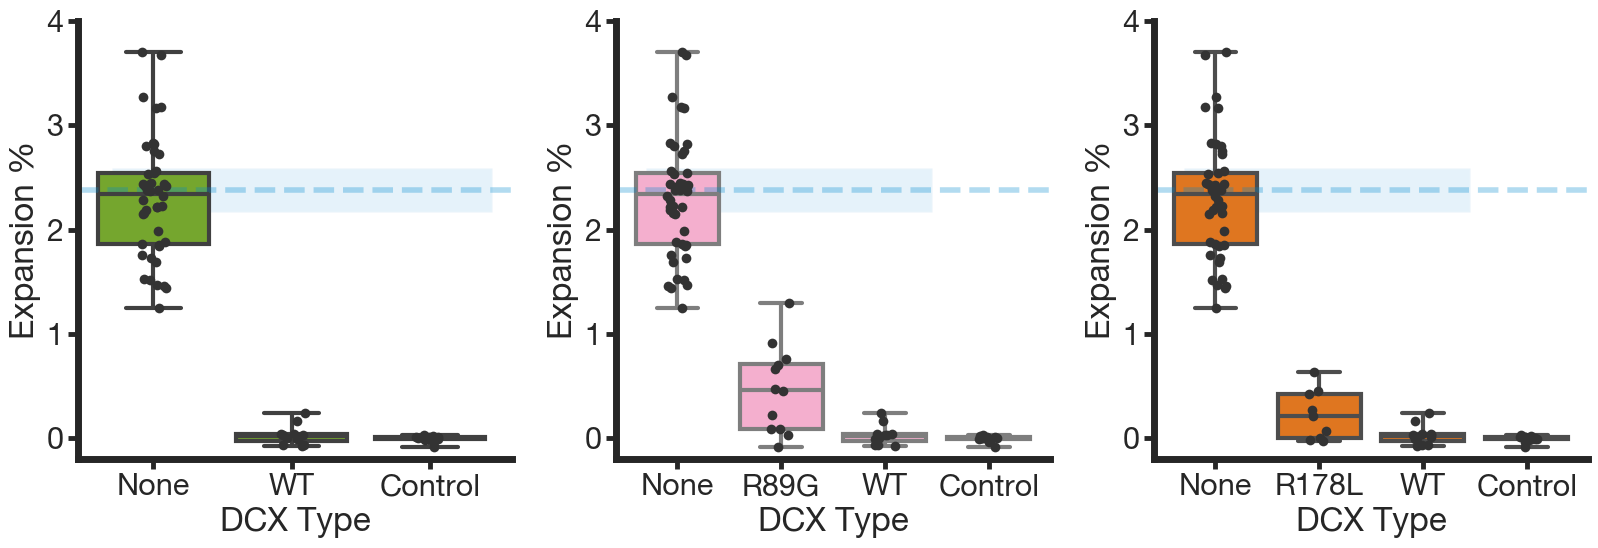

In [57]:
x0 = np.arange(-0.3, 2.5, 0.05)

fig, ax = plt.subplots(1,3,figsize=(16.5,6))

for i in np.arange(len(ax)):

    DCXdata = finalData[((finalData['DCX Type']=='None') & (finalData[drug]==10))| (finalData['DCX Type']=='WT') | (finalData['DCX Type']==Mut[i])| (finalData[drug]==0)]

    sns.boxplot(x=Type, y='Expansion %', data=DCXdata, whis=np.inf, color=dcx_palette[i],linewidth=3, ax=ax[i])
    sns.stripplot(x=Type, y='Expansion %', data=DCXdata, size=7, ax=ax[i], color=".2")
                  #, hue = 'Curve Length (um)', palette = 'flare') #, color=".2") #, hue = 'Curve Length (um)')

    ax[i].axhline(y = mean_exp, color = cyan ,linestyle="--", linewidth=4,alpha = 0.3) 
    ax[i].fill_between(x0, mean_exp - sem_exp, mean_exp + sem_exp, facecolor=cyan, alpha=0.1)

    ax[i].set_ylim(-0.2,4)
    ax[i].spines['left'].set_lw(5)
    ax[i].spines['bottom'].set_lw(5)
    ax[i].tick_params(axis='both', width = 3.5, length = 7)
    
    #ax[i].legend([])


sns.set_style("ticks")
sns.despine()

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})

plt.tight_layout()


#plt.savefig(mydir/('compaction_Wcontrol'+date_today+'.pdf'))
# plt.savefig(path/('compaction_'+date_today+'.png'))

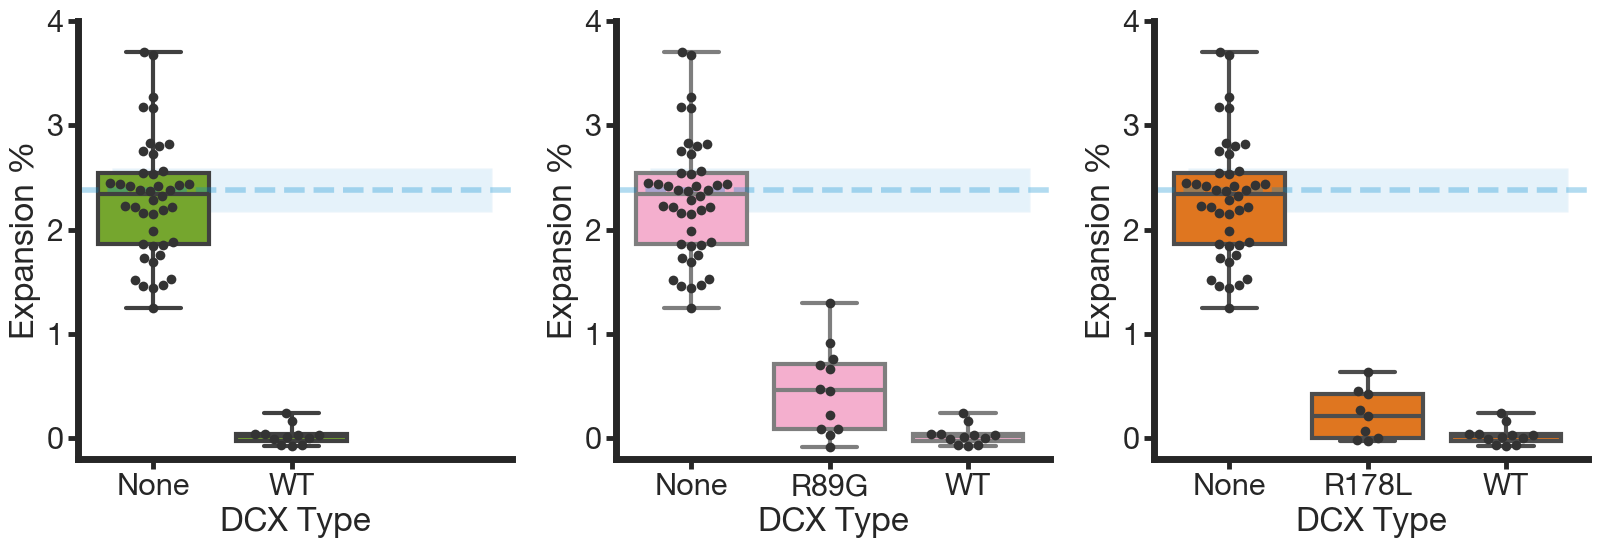

In [58]:
x0 = np.arange(-0.3, 2.5, 0.05)

fig, ax = plt.subplots(1,3,figsize=(16.5,6))

for i in np.arange(len(ax)):

    DCXdata = finalData[((finalData['DCX Type']=='None') & (finalData[drug]==10))| (finalData['DCX Type']=='WT') | (finalData['DCX Type']==Mut[i])]

    sns.boxplot(x=Type, y='Expansion %', data=DCXdata, whis=np.inf, color=dcx_palette[i],linewidth=3, ax=ax[i])
    sns.swarmplot(x=Type, y='Expansion %', data=DCXdata, size=7, ax=ax[i], color=".2")
                  #, hue = 'Curve Length (um)', palette = 'flare') #, color=".2") #, hue = 'Curve Length (um)')

    ax[i].axhline(y = mean_exp, color = cyan ,linestyle="--", linewidth=4,alpha = 0.3) 
    ax[i].fill_between(x0, mean_exp - sem_exp, mean_exp + sem_exp, facecolor=cyan, alpha=0.1)

    ax[i].set_ylim(-0.2,4)
    ax[i].spines['left'].set_lw(5)
    ax[i].spines['bottom'].set_lw(5)
    ax[i].tick_params(axis='both', width = 3.5, length = 7)
    
    #ax[i].legend([])


sns.set_style("ticks")
sns.despine()

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})

plt.tight_layout()


plt.savefig(mydir/('compaction_WOcontrol'+date_today+'.pdf'))
# plt.savefig(path/('compaction_'+date_today+'.png'))

In [59]:
none_exp = finalData[ (finalData['DCX Type']=='None') ]['Expansion %'].values
wt_compact = finalData[ (finalData['DCX Type']=='WT') ]['Expansion %'].values
r89g_compact = finalData[ (finalData['DCX Type']=='R89G') ]['Expansion %'].values
r178l_compact = finalData[ (finalData['DCX Type']=='R178L') ]['Expansion %'].values

In [60]:
none_exp

array([2.72472406, 2.79825319, 3.17104161, 2.44565763, 2.41707174,
       1.98135213, 2.36591863, 1.87962304, 2.3780591 , 1.84874922,
       2.31932458, 2.43743378, 2.37527391, 1.46468196, 2.53969288,
       1.24318484, 1.45814368, 2.42959739, 1.83775845, 1.86276895,
       1.43662013, 1.68842484, 2.43414643, 2.21528414, 1.52397311,
       2.2785084 , 2.41885083, 2.22998987, 2.56387059, 2.18447597,
       2.15681889, 1.72221899, 1.51087941, 2.15097107, 2.53087917,
       3.16234111, 2.8266461 , 2.21607855, 2.74879367, 1.7573134 ,
       3.2680745 , 3.7052511 , 3.67479871, 2.81807659, 0.02714314,
       0.28846871, 0.11429395, 0.06321428, 0.19391013, 0.40701703,
       0.16848597, 0.04330519, 0.19057897, 0.33121005, 0.21202513,
       0.1373974 , 1.5636467 , 1.51515384, 1.07694574, 0.53887493,
       0.89992613, 1.08177195, 0.34265545, 0.44077631, 2.24537496,
       0.82371904, 2.03950845, 2.99001293, 2.68193127, 3.22719762,
       2.67528763, 2.7235165 , 2.19068536, 2.04271698])

In [61]:
sp.stats.ttest_ind(wt_compact, r89g_compact, axis=0, equal_var=False,alternative = "less") #one star

TtestResult(statistic=-3.5458851935462237, pvalue=0.001987650425800098, df=12.105908779618403)

In [15]:
sp.stats.ttest_ind(wt_compact, r178l_compact, axis=0, equal_var=False,alternative = "less") #n.s.

TtestResult(statistic=-2.324315161301438, pvalue=0.021415342105999793, df=9.849106997948992)

In [16]:
sp.stats.ttest_ind(r89g_compact, r178l_compact , axis=0, equal_var=False,alternative = "two-sided")

TtestResult(statistic=1.6746221470625993, pvalue=0.11129071300079323, df=18.00396446142569)

In [43]:
def median_quantiles(joindata):
    expdata = joindata[['DCX Type','Expansion %']]
    medianexp = expdata.groupby('DCX Type').quantile([0.5])
    Q25data = expdata.groupby('DCX Type').quantile([0.25])
    Q75data = expdata.groupby('DCX Type').quantile([0.75])
    return pd.concat([medianexp.reset_index(), Q25data.reset_index(), Q75data.reset_index()], axis=1)

In [44]:
median_quantiles(joindata)

,DCX Type,level_1,Expansion %,DCX Type,level_1,Expansion %,DCX Type,level_1,Expansion %
0,None,0.5,2.222637,None,0.25,1.840506,None,0.75,2.426911
1,R178L,0.5,0.208652,R178L,0.25,-0.003649,R178L,0.75,0.424582
2,R89G,0.5,0.460374,R89G,0.25,0.088203,R89G,0.75,0.710424
3,WT,0.5,0.018909,WT,0.25,-0.024724,WT,0.75,0.036588


In [38]:
def mean_sd(joindata, dcxname, drugconc):
    expdata = joindata[(joindata[Type] == dcxname) & (joindata[drug] == drugconc)][[Type,'Expansion %']]
    meandata = expdata.groupby([Type]).mean()
    stddata = expdata.groupby([Type]).sem()
    ncount = expdata.groupby([Type]).count()
    x = meandata.index.values
    y = meandata['Expansion %'].values
    yerr = stddata['Expansion %'].values
    n = ncount['Expansion %'].values
    
    data = {Type : dcxname,
        drug: x,
        'Mean Expansion %': y,
         'SEM Expansion %': yerr,
            'n': n
           }
    
    df = pd.DataFrame(data)

    return df

In [41]:
mean_sd(finalData, 'WT',10)

,DCX Type,[Drug] ($\mu$M),Mean Expansion %,SEM Expansion %,n
0,WT,WT,0.027292,0.027055,12


In [40]:
mean_sd(finalData, 'Control', 0)

,DCX Type,[Drug] ($\mu$M),Mean Expansion %,SEM Expansion %,n
0,Control,Control,-0.005661,0.007015,15


In [42]:
mean_sd(finalData, 'None', 10)

,DCX Type,[Drug] ($\mu$M),Mean Expansion %,SEM Expansion %,n
0,None,None,2.300036,0.086749,44


In [44]:
mean_sd(finalData, 'R89G',10)

,DCX Type,[Drug] ($\mu$M),Mean Expansion %,SEM Expansion %,n
0,R89G,R89G,0.465263,0.120516,12


In [45]:
mean_sd(finalData, 'R178L',10)

,DCX Type,[Drug] ($\mu$M),Mean Expansion %,SEM Expansion %,n
0,R178L,R178L,0.223191,0.079822,9


In [64]:
control = finalData[ (finalData[drug]==0) ]['Expansion %'].values

In [22]:
wt_compact

array([0.1640103936490944, -0.065683829, -0.011070619, 0.025491733,
       0.036230161, 0.037662772, 0.00159547, 0.012326643, -0.072970858,
       -0.070943648, 0.2441611531670107, 0.026698564], dtype=object)

In [65]:
control

array([-0.00481313,  0.00200268, -0.08521625, -0.03371603,  0.03306943,
        0.01652796,  0.01203349,  0.00793386, -0.01041992, -0.0084321 ,
        0.00418154, -0.00433377,  0.00902561,  0.        , -0.02275096])

In [66]:
sp.stats.ttest_ind(wt_compact,control, axis=0, equal_var=False,alternative = "greater")

TtestResult(statistic=1.17901579441432, pvalue=0.13018691957374, df=12.484535143863065)

In [19]:
sp.stats.ttest_ind(noneexp, r89g_compact , axis=0, equal_var=False)

TtestResult(statistic=-3.9009648460762842, pvalue=0.0024416381828750162, df=11.074570134891317)

In [20]:
sp.stats.ttest_ind(noneexp, r178l_compact, axis=0, equal_var=False) #n.s.

TtestResult(statistic=-2.8560136161293315, pvalue=0.020949482667167636, df=8.123780880306944)

In [46]:
sp.stats.ttest_ind( r178l_compact, r89g_compact , axis=0, equal_var=False)

TtestResult(statistic=-1.6746221470625993, pvalue=0.11129071300079323, df=18.00396446142569)

In [21]:
exp10um = finalData[  (finalData['DCX Type']=='Control') & (finalData[drug]==10) ]['Expansion %'].values
sp.stats.ttest_ind(none_exp, exp10um, axis=0, equal_var=False)

TtestResult(statistic=-2.8147165029740084, pvalue=0.008415811457790202, df=30.935360626706135)

In [70]:
DCXdata = finalData[(finalData[DCXconc]==0) &  (finalData[drug]==10)]

In [73]:
x = DCXdata['Curve Length (um)'].values
y = DCXdata['Expansion %'].values

In [74]:
p, cov = np.polyfit(x,y, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]
mG,bG=p
p, SElin

(array([0.01782813, 2.25024024]), array([0.02412712, 0.2462428 ]))

In [77]:
R2S(y,np.multiply(x,p[0])+p[1])

0.009169550565450546

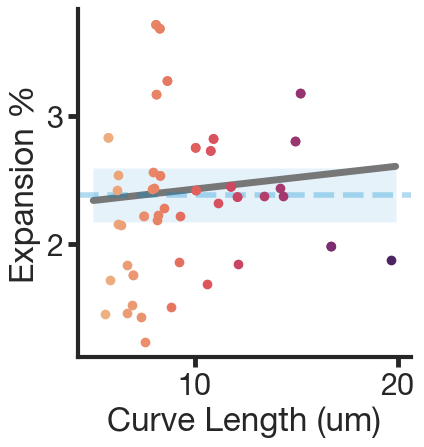

In [86]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
k = np.arange(5, 20, 0.1)



# sns.boxplot(x=Type, y='Expansion %', data=DCXdata, whis=np.inf, color=dcx_palette[i],linewidth=3, ax=ax[i])
sns.stripplot(x='Curve Length (um)', y='Expansion %', data=DCXdata, size=7, hue = 'Curve Length (um)', palette = 'flare',native_scale=True) #, color=".2") #, hue = 'Curve Length (um)')
ax.plot(k, np.multiply(k,p[0])+p[1],color = '#777777', lw=5,ls= '-',alpha = 1)

ax.axhline(y = mean_exp, color = cyan ,linestyle="--", linewidth=4,alpha = 0.3) 
ax.fill_between(k, mean_exp - sem_exp, mean_exp + sem_exp, facecolor=cyan, alpha=0.1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)


sns.set_style("ticks")
sns.despine()

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})

plt.tight_layout()


plt.savefig(mydir/('expansion-by-length_'+date_today+'.pdf'))
# plt.savefig(path/('compaction_'+date_today+'.png'))

In [54]:
(88-12-11-9-10)/2

23.0

In [1]:
notax = 8.3301
tax = 8.5893
taxdcx = 8.3690

In [3]:
def simple_expansion(before,after):
    return (1- before/after)*100

In [4]:
simple_expansion(notax,tax)

3.0177080786560007

In [5]:
simple_expansion(notax,taxdcx)

0.4648106105866856